<a href="https://colab.research.google.com/github/Lipkoffsky/ML_pet_projects/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сравнение трех критериев неоднородности для деревьев решений

Максимизация прироста информации

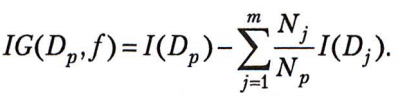

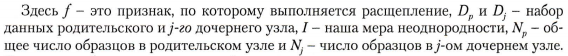

Энтропия

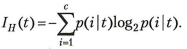

Мера неоднородности Джини

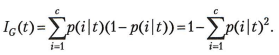

Ошибка классификации

image.png

Реализация сравнения критериев неоднородности для бинарного дерева

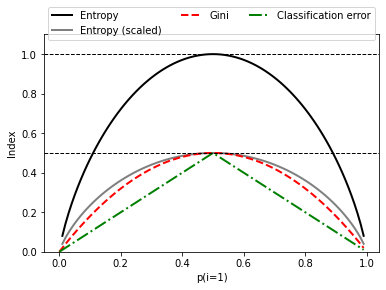

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return p*(1 - p) + (1 - p)*(1 - (1 - p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0., 1., 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c in  zip([ent, sc_ent, gini(x), err]
                          ,['Entropy', 'Entropy (scaled)'
                          ,'Gini', 'Classification error']
                          ,['-', '-', '--', '-.']
                          ,['black', 'gray', 'red', 'green', 'blue']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15)
        , ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Index')
plt.show()


Функция для разделения областей решения

In [8]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    '''Отобразить границы решений для двумерных наборов данных'''

    # Настройка генератора маркеров и палитры
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'purple', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Вывод поверхности решения
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution)
                          ,np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

        # выделить тестовые образы
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='black'
                        , alpha=1.0, linewidths=1, marker='o'
                        , s=55, label='тестовый набор')
    # показать образцы классов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1]
                   ,alpha=0.8, c=cmap(idx)
                   ,marker=markers[idx], label=cl)

Настройка тренировочного датасета

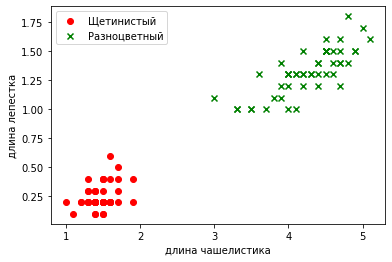

In [9]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # Берем только длину и ширину лепестка
y = iris.target # целевые значения - класс цветка

plt.scatter(X[:50, 0], X[:50, 1], color='red'
            , marker='o', label='Щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1], color='green'
            , marker='x', label='Разноцветный')
plt.xlabel('длина чашелистика')
plt.ylabel('длина лепестка')
plt.legend(loc='upper left')
plt.show()

In [11]:
#Разделяем наш датасет на тестовую и тренировочную части
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.3, random_state=0)

Построение дерева решений

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


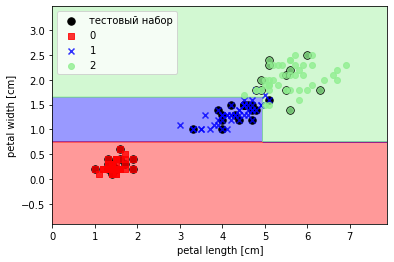

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined
                      ,classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

Random Forest Classifier

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


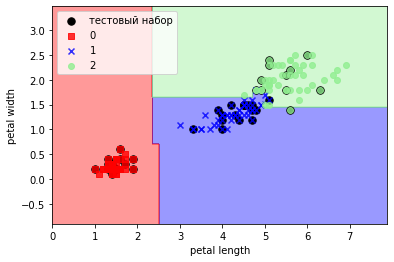

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy'
                              , n_estimators=10
                              , random_state=1
                              , n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined
                      ,classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()


# Алгоритм случайного леса

1. Извлечь случайную бутстрап выборку размера п (случайным образом отобрать из тренировочного набора данных п образцов с возвратом, то есть повторным способом) 
2. Вырастить дерево решений из бутстрап выборки. В каждом узле:

    1) случайным образом отобрать d признаков без возврата, т. . бесповторным
способом;
    
    2) расщепить зел, используя при нак, который обеспечивает наилучшее расщепление согласно целевой функции, например путем максимизации при
роста информации;
    
    3) повторить шаги 1 и 2 k число раз;
    
    4) для назначения метки класса агрегировать прогноз из каждого дерева на
основе большинства голосов.